# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.
The complete analysis was based on the average order value (AOV). However, upon examining the description and statistics of our data, it became apparent that the maximum order value was $704,000, which included 2000 items out of the 5000 orders made. This information was also evident in the histogram, where one order stood out as an outlier. This outlier significantly inflated our AOV, rendering it an imprecise metric for our analysis. The histogram showed a long right tail due to this outlier, indicating the presence of orders with much higher values compared to the majority of orders.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?
A metric that better represents the behavior of the stores could be the median average order value (AOV), as it is less sensitive to extreme values. After calculating this metric, I found that it was $284, which is a more realistic value considering that the shops sell relatively affordable items. Using the median AOV provides a more robust measure of central tendency compared to the mean AOV, especially in the presence of outliers.Another valuable metric is the average order value per item. Given that the maximum order value included 2000 items, this new metric allows us to understand the average price per item in each order, providing more precise insights into customer purchasing behavior.

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior. 
After using the 'created_at' column as a proxy for the date and time of order creation and plotting the average daily order value over the 30 days of the analysis, we observed that the orders didn't follow a strict pattern. Instead, they fluctuated constantly throughout the days, exhibiting different peaks. However, as mentioned before, the day with the highest average order value per item coincided with the date of the maximum order value, which was on 2017-03-28.

          order_id      shop_id      user_id    order_value  total_items
count  5000.000000  5000.000000  5000.000000    5000.000000   5000.00000
mean   2500.500000    50.078800   849.092400    3145.128000      8.78720
std    1443.520003    29.006118    87.798982   41282.539349    116.32032
min       1.000000     1.000000   607.000000      90.000000      1.00000
25%    1250.750000    24.000000   775.000000     163.000000      1.00000
50%    2500.500000    50.000000   849.000000     284.000000      2.00000
75%    3750.250000    75.000000   925.000000     390.000000      3.00000
max    5000.000000   100.000000   999.000000  704000.000000   2000.00000


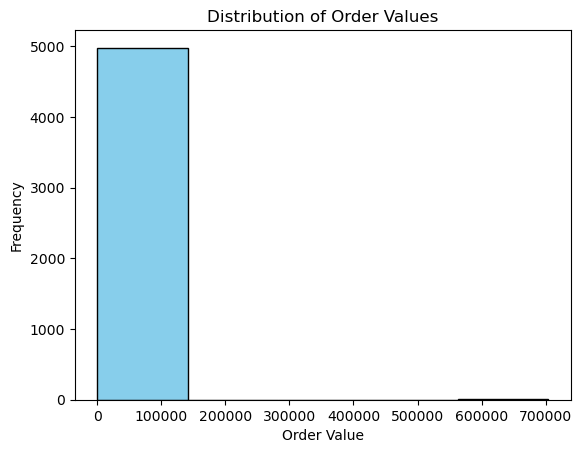

Number of orders with order values greater than $100,000: 19
Median Order Value: 284.0
Average Order Value per Item (AOVI): 387.7428


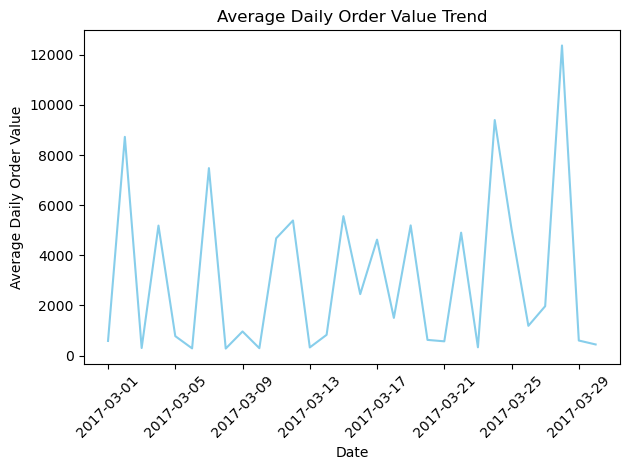

Date and value of maximum order value: 2017-03-28 704000


In [65]:
df = pd.read_csv("orders.csv")

# Description of data
print(df.describe())

# Histogram
plt.hist(df["order_value"], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.title('Distribution of Order Values')
plt.show()

# Presence of outliers
orders_outliers = df[df["order_value"] > 100000].shape[0]
print("Number of orders with order values greater than $100,000:", orders_outliers)

# Median value
median_order_value = df["order_value"].median()
print("Median Order Value:", median_order_value)

# Avg order value per item
df['aovi'] = df['order_value'] / df['total_items']
aovi_mean = df['aovi'].mean()
print("Average Order Value per Item (AOVI):", aovi_mean)


# Created at
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date
avg_daily_order_value = df.groupby('date')['order_value'].mean()

plt.plot(avg_daily_order_value.index, avg_daily_order_value.values, color='skyblue')
plt.xlabel('Date')
plt.ylabel('Average Daily Order Value')
plt.title('Average Daily Order Value Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

max_order_value = df["order_value"].max()
date_of_max_order_value = avg_daily_order_value.idxmax()
print("Date and value of maximum order value:", date_of_max_order_value, max_order_value)
